In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(5,5)})

In [2]:
df=pd.read_csv('world-happiness-report.csv')

In [3]:
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
df['Country name'].value_counts()

Colombia      15
Kyrgyzstan    15
China         15
Kenya         15
Cambodia      15
              ..
Oman           1
Maldives       1
Cuba           1
Guyana         1
Suriname       1
Name: Country name, Length: 166, dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


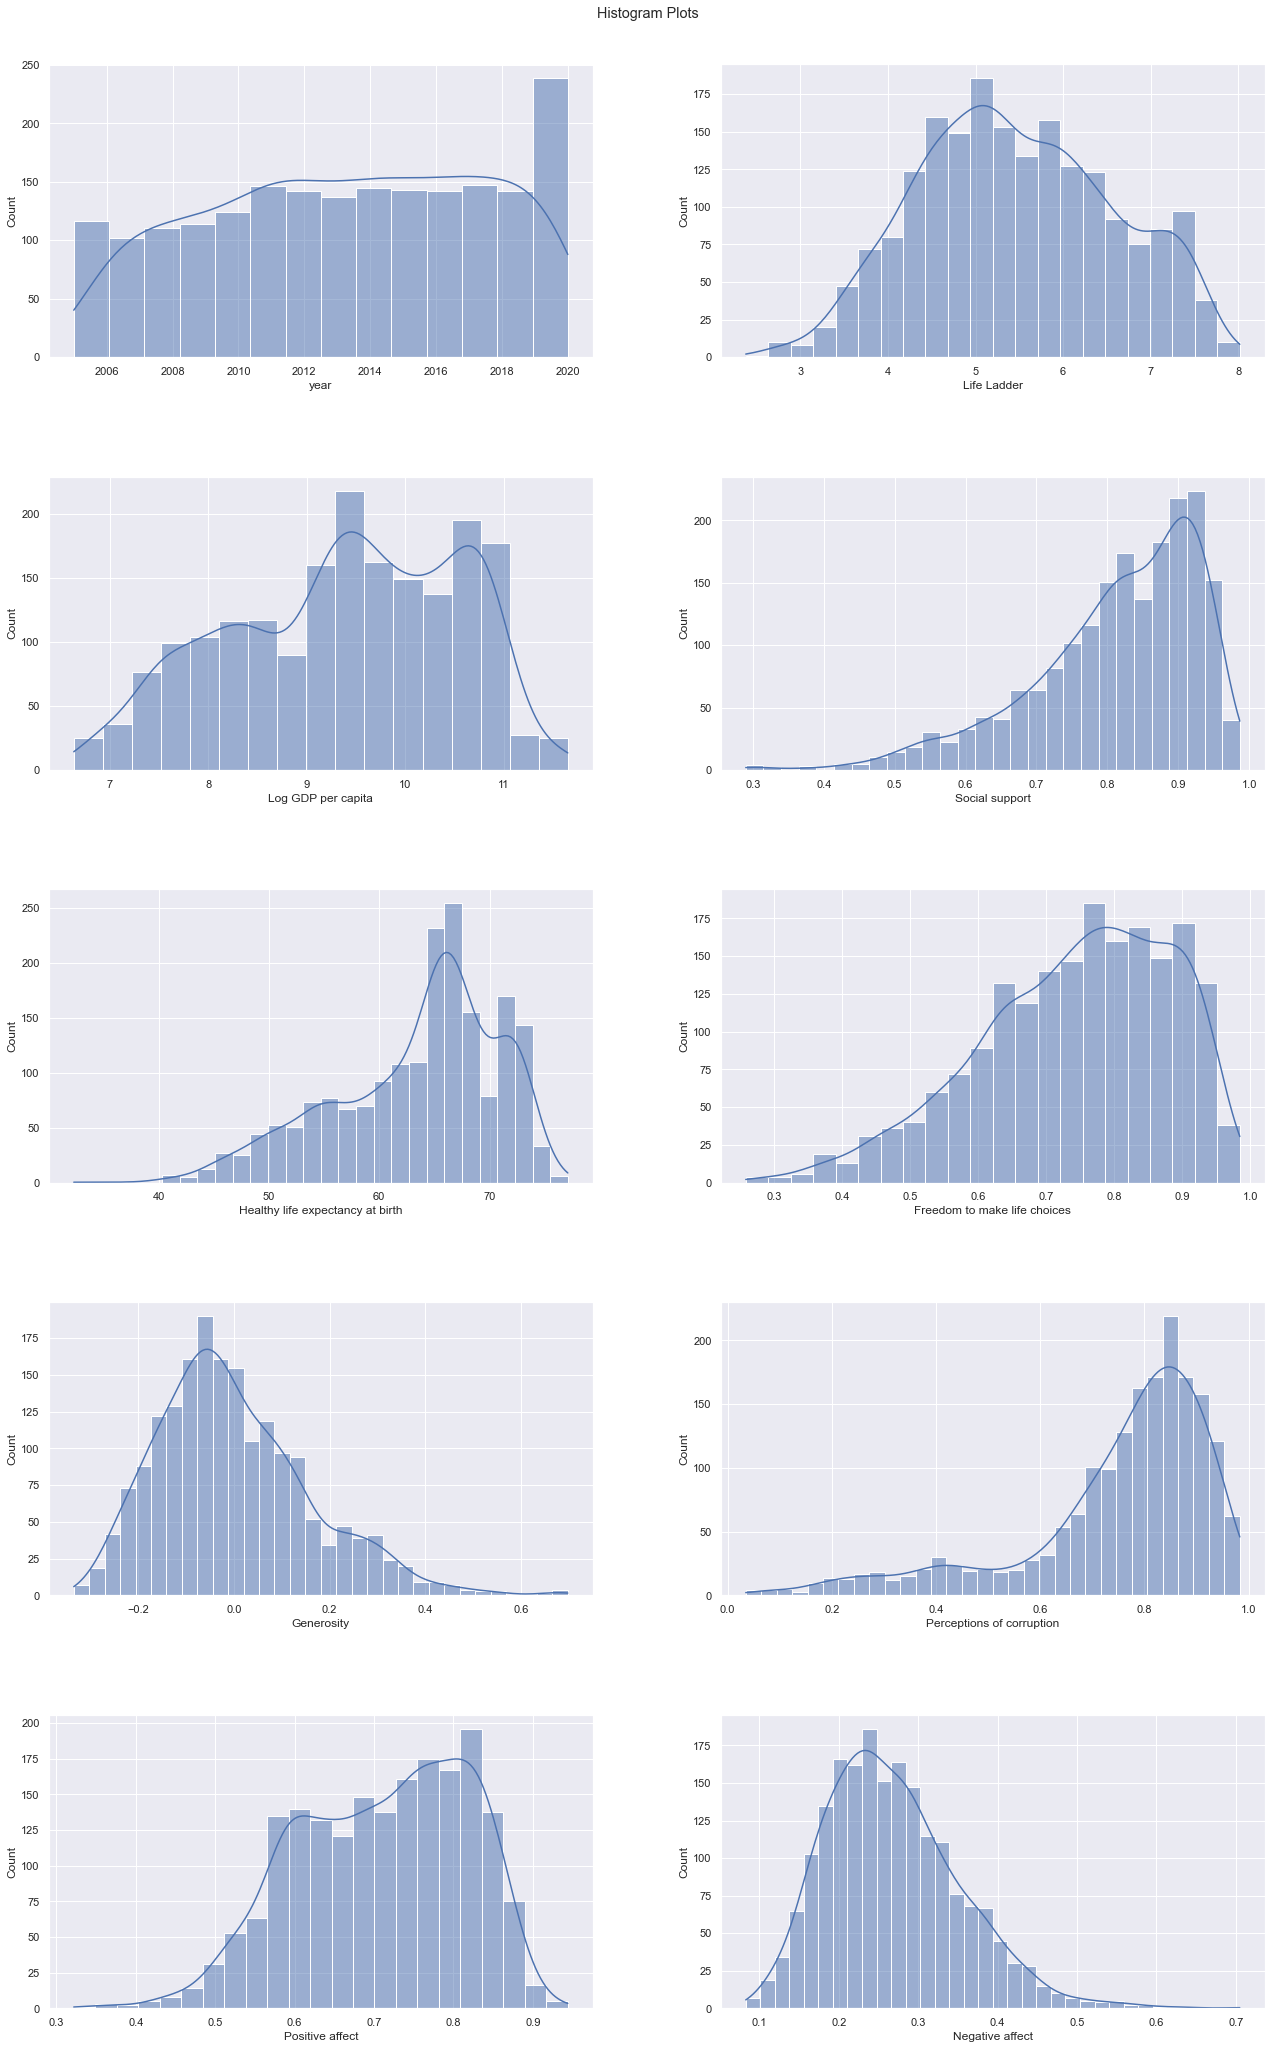

In [7]:
f, axes=plt.subplots(5,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle('Histogram Plots')
cols=df.select_dtypes(exclude='object').columns # sayılar verilerle görselleşitme yaptıpmız için obj yi almıyoruz


x_axes=0
y_axes=0
for col in cols:
    sns.histplot(data=df,x=col,kde=True,ax=axes[x_axes,y_axes])
    if y_axes==1:
        y_axes=0
        x_axes+=1
    else:
        y_axes+=1
plt.savefig('Plots/histogram_plots.png')

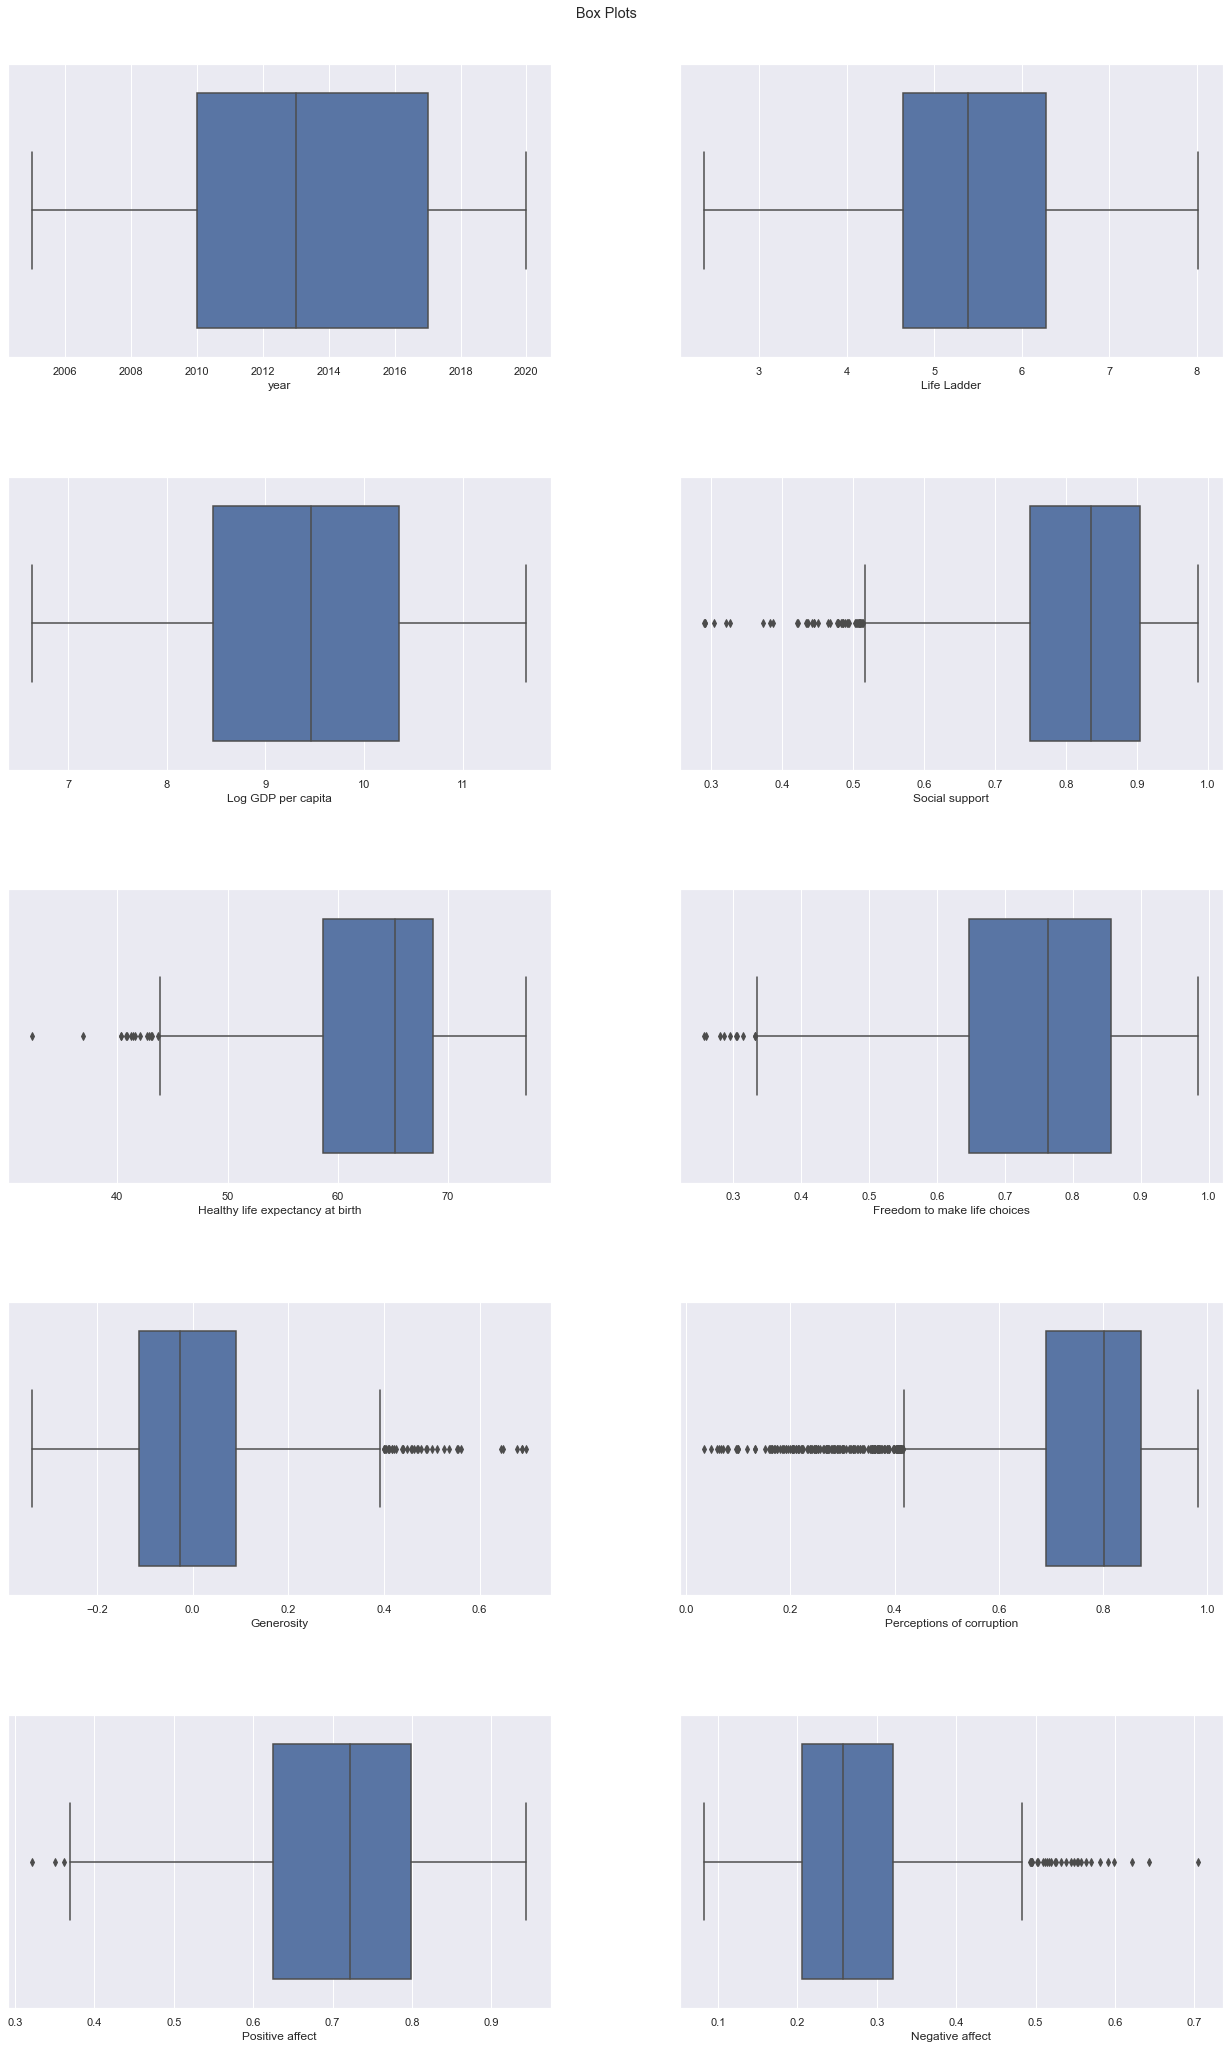

In [8]:
f, axes=plt.subplots(5,2,figsize=(20,30))
f.tight_layout(pad=8)
f.suptitle('Box Plots')
cols=df.select_dtypes(exclude='object').columns # sayılar verilerle görselleşitme yaptıpmız için obj yi almıyoruz


x_axes=0
y_axes=0
for col in cols:
    sns.boxplot(data=df,x=col,ax=axes[x_axes,y_axes])
    if y_axes==1:
        y_axes=0
        x_axes+=1
    else:
        y_axes+=1
plt.savefig('Plots/box_plots.png')

In [9]:
year_group=df.groupby(by='year').sum()

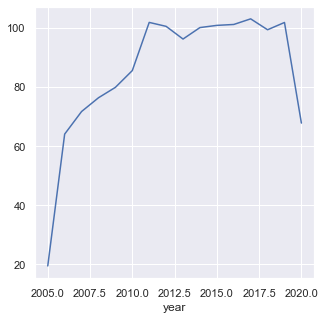

In [10]:
year_group['Positive affect'].plot()
plt.savefig('Plots/Positive affect.png')

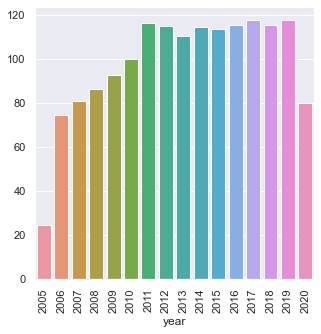

In [11]:
ax1=sns.barplot(x=year_group.index,y=year_group['Social support'].values)
ax1.tick_params(axis='x',rotation=90)
plt.savefig('Plots/Social Support.png')


Text(0.5, 1.0, 'Correlation Matrix')

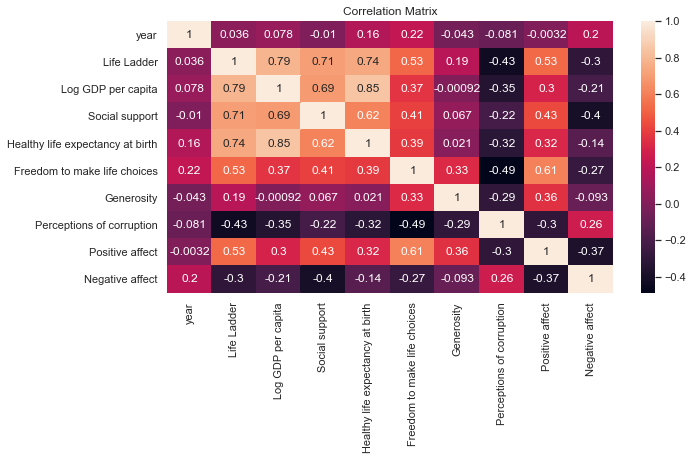

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(df.corr(),annot=True)
plt.title('Correlation Matrix')
#plt.savefig('Plots/Correlation matrix.png')

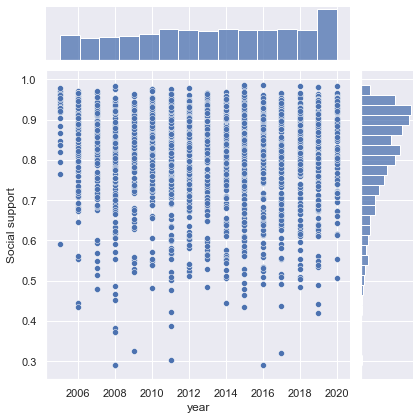

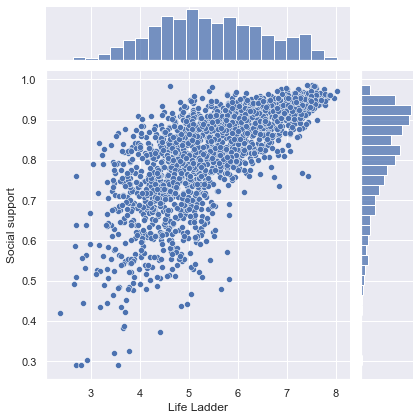

In [13]:
sns.jointplot(data=df,x='year',y='Social support')
sns.jointplot(data=df,x='Life Ladder',y='Social support')
plt.savefig('Plots/LL SOCIAL support.png')

In [14]:
import os
from os import listdir,mkdir
# from os.path import isfile, join # mesela png dosyası olup olmadığını kontrol etmek için kullanabiliriz


In [16]:
all_files=os.listdir('Plots')
reports=[f"Plots/{file}" for file in all_files]
reports

['Plots/box_plots.png',
 'Plots/Correlation matrix.png',
 'Plots/histogram_plots.png',
 'Plots/LL SOCIAL support.png',
 'Plots/Positive affect.png',
 'Plots/Social Support.png']

In [22]:
!pip install FPDF  # jupiterde direkt buradan halledebilirim ya da promptan da kulrulabilir

ERROR: Invalid requirement: '#'


In [23]:
from fpdf import FPDF

In [24]:
width=210
height=297  #A4 ün pixel boyutu rapor için gerekli olacak


In [27]:
pdf=FPDF()
pdf.set_font('Arial','B',48)
pdf.add_page()
pdf.cell(190,20,txt='REPORT',align='C')


for report in reports:
    pdf.add_page()
    pdf.set_font('Arial','B',24)
    pdf.cell(190,20,txt=report,align='C')
    pdf.image(report,x=5,y=30,w=width-5)
    
pdf.output('Countries_Report.pdf')

''